In [1]:
#Importamos librerías necesarias para implementar la red neuronal
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
from sklearn.datasets import make_circles

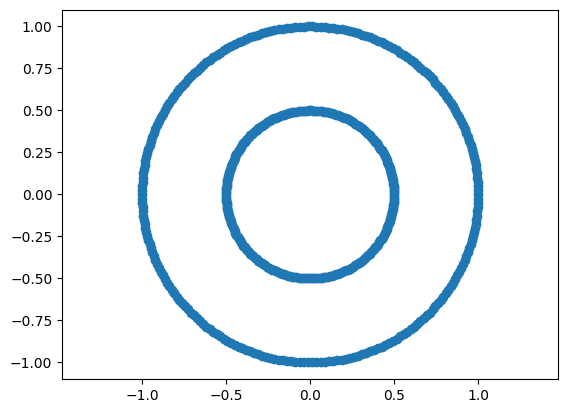

In [6]:
#Creamos el dataset
n = 500 #cantidad de registros de mi dataset
p = 2 #cantidad de características de cada registro

X, Y = make_circles(n_samples=n, factor=.5) # factor es la distincia entre ambos circulos
plt.scatter(X[:,0], X[:,1])
plt.axis("equal") #misma tamaño de ejes x e y para poder visualizar un circulo
plt.show()

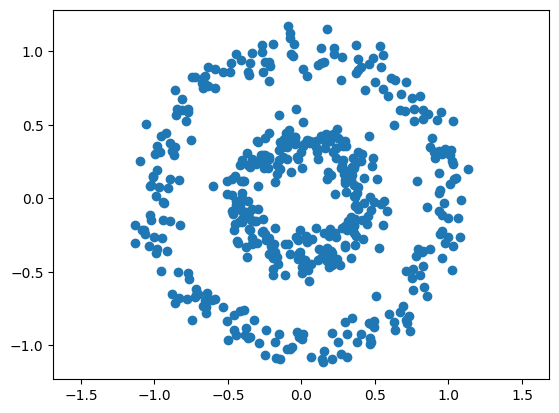

In [7]:
#Le agregamos ruido para que los puntos no formen un circulo perfecto
X, Y = make_circles(n_samples=n, factor=.4, noise = 0.08) # factor es la distincia entre ambos circulos
plt.scatter(X[:,0], X[:,1])
plt.axis("equal")
plt.show()

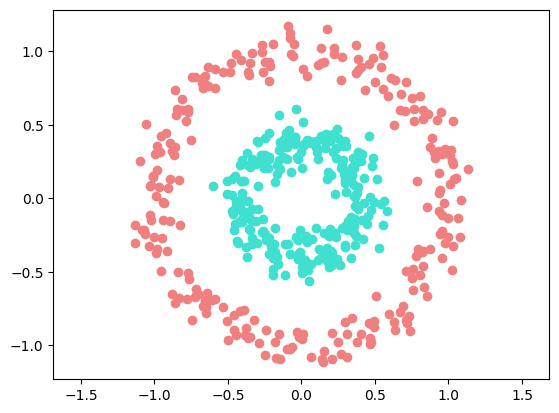

In [8]:
#Le agregamos color para que se diferencien ambos circulos
#En el eje X tenemos todos los puntos (x,y) de ambos circulos
#y en el eje Y tenemos  u array indicando si corresponde al
#circulo de afuera o al de adentro
#print(X)
#print(Y)
plt.scatter(X[Y==0,0], X[Y==0,1], c='lightcoral')
plt.scatter(X[Y==1,0], X[Y==1,1], c='turquoise')
plt.axis("equal")
plt.show()

In [9]:
print(Y)
print(Y.shape)
Y = Y[:,np.newaxis] #Transformo Y de una serie a una lista de 500 registros,
    #cada uno de los cuales tiene un único elemento (esto lo hago para cuando
    #entrene la red neuronal)
print(Y.shape)
print(Y)

[1 1 0 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 0 1 0 0 0 1 1 1 1 1 0 0 0 1 1 1 1 1
 1 0 1 0 0 1 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 0 0 1
 0 1 0 0 0 0 0 0 1 1 1 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 0 0 1 0 0 1 1 0 0
 1 1 0 1 1 0 0 0 0 1 1 1 1 0 0 1 0 1 1 0 0 0 1 1 1 0 1 0 0 1 0 1 0 0 1 0 1
 1 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 0
 1 1 1 1 0 0 0 0 1 1 0 1 1 0 0 1 1 0 0 1 1 0 0 0 0 1 1 0 0 0 1 1 0 0 1 0 0
 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1 0 1 1 0 1 0 0 1 0 0 0 0
 0 0 1 1 1 1 1 0 0 1 1 0 0 1 0 0 0 1 0 1 0 1 0 1 0 0 1 1 1 1 1 0 0 1 0 0 0
 1 1 1 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 1 1 1 1 1 0 1 0 0 0 1 0 0 1 1 1
 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 1 0 0 1 1 1 1 0 1 0 0 0 1 1 0 1 1 1 1
 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0
 0 0 1 1 0 1 0 0 1 1 0 0 0 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 0 1 1 1 1
 1 1 0 1 0 1 0 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 0 0 0 0 1 1 1 1 0 0 1 1 0 1 0
 0 0 1 0 0 0 1 1 0 1 0 1 

### El objetivo que buscamos a continuación es programar una red neuronal que pueda separar ambas nubes de puntos

In [10]:
#Clase que representa una capa de la red neuronal
class neural_layer():
  #n_conn: número de conecciones que recibe esta capa
  #n_neur: cantidad de neuronas de la capa
  #act_f: función de activación
  def __init__(self, n_conn, n_neur, act_f):
    self.act_f = act_f
    #La función rand devuelve valores entre 0 y 1
    #y nosotros necesitamos que sea entre -1 y 1.
    #Vamos a generar un único registro de bias de
    #tantos elementos como neuronas tengamos
    self.b = np.random.rand(1, n_neur) * 2 - 1
    #Y vamos a generar tantos registros de pesos como
    #conexiones tengamos, cada uno de los cuales tendrá
    #tantos elementos como neuronas tengamos
    self.w = np.random.rand(n_conn, n_neur) * 2 - 1

In [11]:
#Ej parámetro b para 5 neuronas
np.random.rand(1, 5) * 2 - 1

array([[-0.4007811 ,  0.99987587,  0.41977467, -0.75748882, -0.05690405]])

In [12]:
#Ej parámetro w para 10 conexiones y 5 neuronas
np.random.rand(10, 5) * 2 - 1

array([[ 0.08541016, -0.9385439 ,  0.85888662,  0.37816059, -0.35417907],
       [ 0.4294777 ,  0.03066358,  0.92000314, -0.50005278, -0.5143154 ],
       [ 0.97446725,  0.46674683, -0.03475141,  0.967458  ,  0.89649165],
       [ 0.48701197, -0.54771346,  0.18641007,  0.52631663, -0.41494553],
       [-0.43293717,  0.67620503, -0.3233004 , -0.59234144,  0.06711772],
       [ 0.49509529, -0.56764449, -0.16281668,  0.32953611,  0.0386292 ],
       [-0.20114702, -0.98507179, -0.19352936, -0.4979816 , -0.63034771],
       [-0.80497854, -0.39598489, -0.71602601,  0.02879931,  0.46263915],
       [-0.22067916, -0.91441038,  0.2763557 , -0.67859821,  0.28049826],
       [-0.12532148,  0.447585  ,  0.04353114,  0.26169136, -0.7742873 ]])

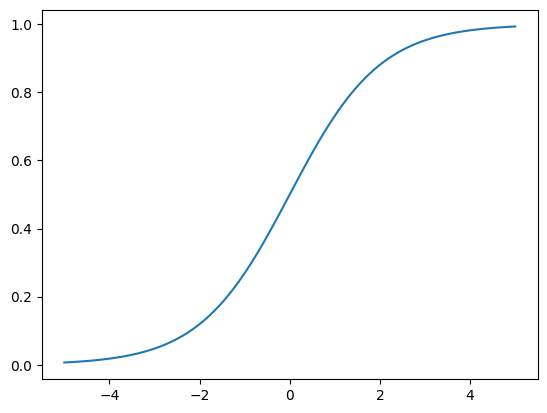

In [13]:
#Definimos las funciones de activación que permitirán eliminar
#linealidad de la red neuronal
#Comenzamos con la sigmoide
sigm = (lambda x: 1 / (1 + np.e ** (-x)),
        lambda x: x * (1 - x))
#lo graficamos para ver cómo se visualiza
_x = np.linspace(-5,5,100) #definimos 100 puntos dentro del intervalo -5, 5
#visualizamos la función sigmoide
plt.plot(_x, sigm[0](_x))

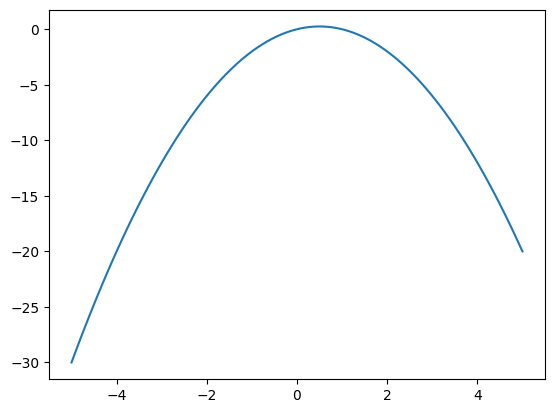

In [14]:
#y visualizamos también su derivada
plt.plot(_x, sigm[1](_x))

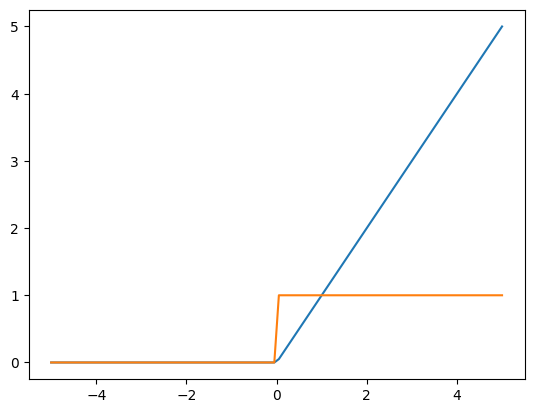

In [15]:
#Hacemos lo propio con la RELU
relu = (lambda x: np.maximum(0,x),
        lambda x: np.where(x <= 0, 0, 1))
_x = np.linspace(-5,5,100)
plt.plot(_x, relu[0](_x))
plt.plot(_x, relu[1](_x))

In [16]:
#podríamos crear nuestra red neuronal capa a capa
l0 = neural_layer(p,4,sigm) #p: nro de conexiones de entrada
l1 = neural_layer(4,8,sigm)
l2 = neural_layer(8,6,sigm)
#etc...

In [17]:
#Pero lo vamos a hacer de una forma más cómoda y elegante
#topology: lista que representa la topología de la red
#Ej: topology = [p, 4, 8, 16, 8, 4, 1]
def create_rna(topology, act_f):
  rna = []
  for l, layer in enumerate(topology[:-1]):
    rna.append(neural_layer(layer, topology[l+1], act_f))
  return rna

In [18]:
topology = [p, 4, 8, 16, 8, 4, 1]
mi_red = create_rna(topology, sigm)

In [19]:
#defino la función de costo como el error cuadrático medio (y su derivada)
f_cost = (lambda Yp, Yr: np.mean((Yp - Yr) ** 2),
          lambda Yp, Yr: Yp - Yr)

#Entrenamiento de la red
def train(rna, X, Y, fun_cost, learning_rate=0.05, train_mode=True):

  #Propagación hacia adelante
  #Ejemplo para la primer capa. Primero la salida de la neurona:
  #z = X @ rna[0].w + rna[0].b, donde el @ es multiplicación vectorial/matricial
  #Y ahora la activación:
  #a = rna[0].act_f(z)
  out = [(None, X)] #Este vector tendrá [(z0,a0),(z1,a1),...]. Lo inicializo asi
                    #porque es lo que necesito para la primer capa
  for layer in rna:
    z = out[-1][1] @ layer.w + layer.b
    a = layer.act_f[0](z)
    out.append((z,a))

  #Si estamos en modo entrenamiento, implementamos backpropagation
  if train_mode:
    #Propagación hacia atrás
    deltas = []
    for l in reversed(range(0, len(rna))):
      z = out[l+1][0]
      a = out[l+1][1]
      #Calculo el delta y lo inserto al principio de la lista de deltas
      #Si estamos en la última capa, delta se calcula de una manera
      if l == len(rna) - 1:
        deltas.insert(0, fun_cost[1](a,Y) * rna[l].act_f[1](a))
      #en cambio, si no estamos en la última capa, delta se calcula distinto
      else:
        deltas.insert(0, deltas[0] @ _w.T * rna[l].act_f[1](a))

      _w = rna[l].w

      #Descenso del gradiente
      #Hacemos uso de las deltas para corregir los parámetros de la red
      rna[l].b = rna[l].b - np.mean(deltas[0], axis=0, keepdims= True) * learning_rate
      rna[l].w = rna[l].w - out[l][1].T @ deltas[0] * learning_rate

  return out[-1][1]

#Prueba de entrenamiento:
train(mi_red, X, Y, f_cost)

array([[0.34721585],
       [0.34685057],
       [0.34729855],
       [0.34691323],
       [0.3471601 ],
       [0.34683706],
       [0.34716826],
       [0.34716987],
       [0.34707464],
       [0.34741944],
       [0.34730629],
       [0.34712476],
       [0.34698581],
       [0.34629995],
       [0.34706013],
       [0.34679682],
       [0.34712497],
       [0.34722612],
       [0.34684354],
       [0.34632912],
       [0.34678169],
       [0.3474586 ],
       [0.34637258],
       [0.34709009],
       [0.34724339],
       [0.34710569],
       [0.34716053],
       [0.34680692],
       [0.34703775],
       [0.34700169],
       [0.34746068],
       [0.34726093],
       [0.34699466],
       [0.34690922],
       [0.34677898],
       [0.34668711],
       [0.34689779],
       [0.34715842],
       [0.34671659],
       [0.34695808],
       [0.34699673],
       [0.34739614],
       [0.34673045],
       [0.34683523],
       [0.34725732],
       [0.34722075],
       [0.34745417],
       [0.347

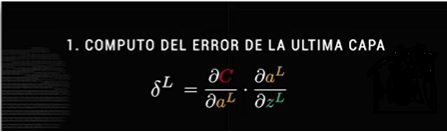

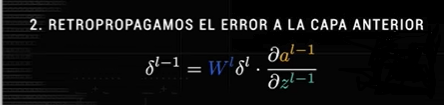

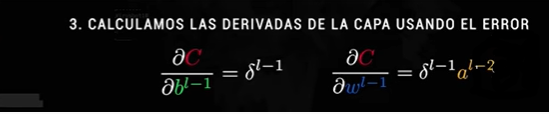

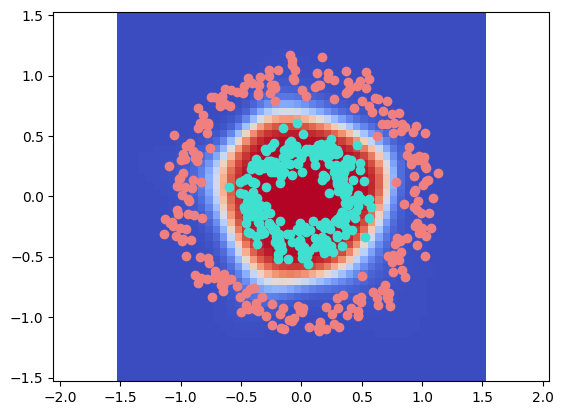

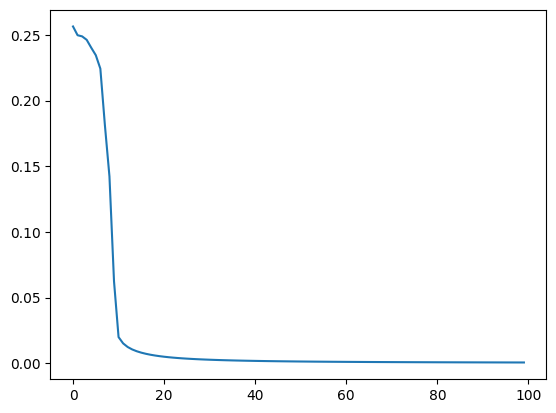

In [20]:
import time
from IPython.display import clear_output

topology = [p, 4, 8, 1]
mi_red = create_rna(topology, sigm)
loss=[]

for i in range(2500):

  #Entrenamos a la red
  pY = train(mi_red, X, Y, f_cost)

  if i % 25 == 0:
    loss.append(f_cost[0](pY, Y))
    res = 50
    _x0 = np.linspace(-1.5, 1.5, res)
    _x1 = np.linspace(-1.5, 1.5, res)
    _Y = np.zeros((res, res))
    for i0, x0 in enumerate(_x0):
      for i1, x1 in enumerate(_x1):
        _Y[i0, i1] = train(mi_red, np.array([[x0, x1]]), Y, f_cost,
                           train_mode=False, learning_rate=0.1)[0][0]
    plt.pcolormesh(_x0, _x1, _Y, cmap = "coolwarm")
    plt.axis("equal")
    plt.scatter(X[Y[:,0]==0,0], X[Y[:,0]==0,1], c='lightcoral')
    plt.scatter(X[Y[:,0]==1,0], X[Y[:,0]==1,1], c='turquoise')
    clear_output(wait = True)
    plt.show()
    plt.plot(range(len(loss)), loss)
    plt.show()
    time.sleep(0.5)

<ipython-input-22-1932637482>:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  flores_filter['variety'] = flores_filter['variety'].replace({'Setosa': 0, 'Versicolor': 1, 'Virginica': 2})
<ipython-input-22-1932637482>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flores_filter['variety'] = flores_filter['variety'].replace({'Setosa': 0, 'Versicolor': 1, 'Virginica': 2})


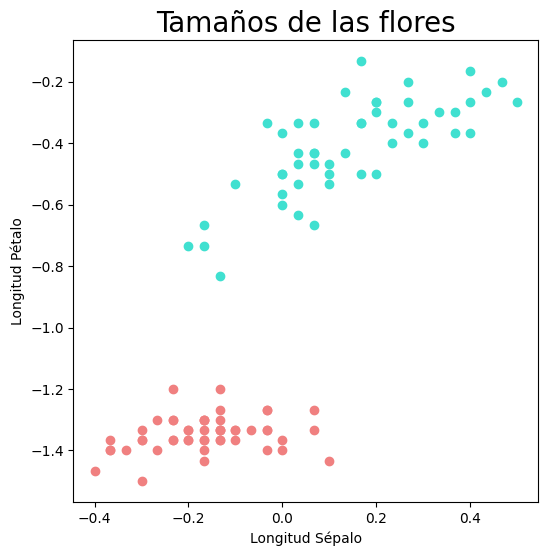

In [22]:
import pandas as pd

flores = pd.read_csv('/content/iris.csv')
flores_simple = flores.drop(columns=['sepal.width','petal.width'])
flores_simple.columns = ['sepal','petal','variety']
flores_filter = flores_simple.query("`variety` != 'Virginica'")
flores_filter['variety'] = flores_filter['variety'].replace({'Setosa': 0, 'Versicolor': 1, 'Virginica': 2})

fig = plt.figure(figsize = (6,6))

ax = fig.add_subplot()
ax.set_xlabel('Longitud Sépalo')
ax.set_ylabel('Longitud Pétalo')
ax.set_title('Tamaños de las flores', fontsize = 20)

color_theme = np.array(['blue', 'green','red'])

X = flores_filter.iloc[:,0:2].values
Y = flores_filter.iloc[:,-1].values
Y = Y[:,np.newaxis]
X = ((X - X.min()) / (X.max() - X.min()))
X = X * 2 - 1.5
plt.scatter(X[Y[:,0]==0,0], X[Y[:,0]==0,1], c='lightcoral')
plt.scatter(X[Y[:,0]==1,0], X[Y[:,0]==1,1], c='turquoise')
plt.show()

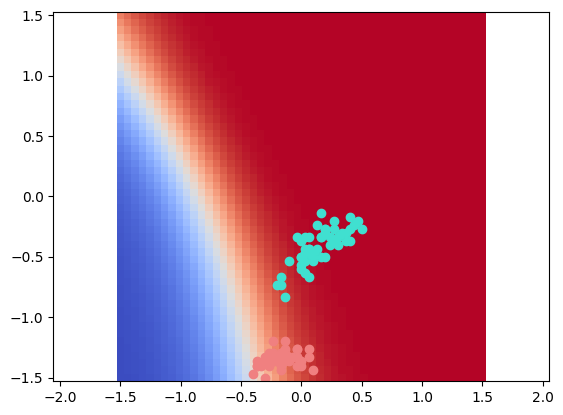

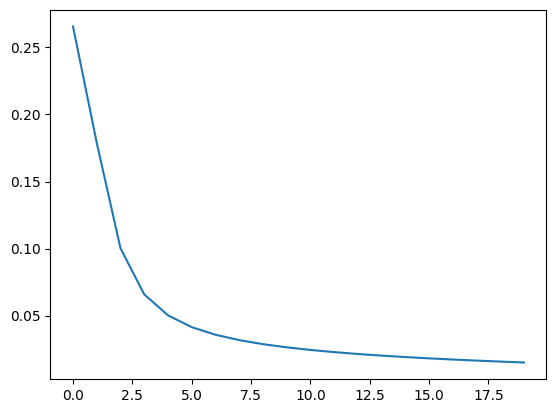

In [23]:
import time
from IPython.display import clear_output

topology = [p, 4, 1]
mi_red = create_rna(topology, sigm)
loss=[]

for i in range(500):

  #Entrenamos a la red
  pY = train(mi_red, X, Y, f_cost)

  if i % 25 == 0:
    loss.append(f_cost[0](pY, Y))
    res = 50
    _x0 = np.linspace(-1.5, 1.5, res)
    _x1 = np.linspace(-1.5, 1.5, res)
    _Y = np.zeros((res, res))
    for i0, x0 in enumerate(_x0):
      for i1, x1 in enumerate(_x1):
        _Y[i0, i1] = train(mi_red, np.array([[x0, x1]]), Y, f_cost,
                           train_mode=False, learning_rate=0.01)[0][0]
    plt.pcolormesh(_x0, _x1, _Y, cmap = "coolwarm")
    plt.axis("equal")
    plt.scatter(X[Y[:,0]==0,0], X[Y[:,0]==0,1], c='lightcoral')
    plt.scatter(X[Y[:,0]==1,0], X[Y[:,0]==1,1], c='turquoise')
    clear_output(wait = True)
    plt.show()
    plt.plot(range(len(loss)), loss)
    plt.show()
    time.sleep(0.5)